# Projet Spotify

### Louis Bahrman et Solal Bizeul

In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn.manifold as mani
import numpy.linalg as lin
import sklearn.discriminant_analysis as disc
import sklearn.preprocessing as skp
import sklearn.model_selection as skms
import sklearn.tree as skt
import sklearn.ensemble as ens
import tensorflow as tf
import sklearn.cluster as clu
import sklearn.metrics as met
import sklearn.linear_model as sklin
import sklearn.naive_bayes as skbay
import sklearn.svm as svm
import sklearn.neighbors as skn
from keras import backend as Kbackend

### Import pour les deux exercices

In [ ]:
test=pd.read_csv("https://raw.githubusercontent.com/solalbiz/SpotifyProject/main/Spotify_test_dataset.csv")
train=pd.read_csv("https://raw.githubusercontent.com/solalbiz/SpotifyProject/main/Spotify_train_dataset.csv")
ex2=pd.read_csv("https://raw.githubusercontent.com/solalbiz/SpotifyProject/main/Spotify_exo2.csv")

## Prétraitement des données 

In [ ]:
train.head()

danceability  energy  ...               song_name            genre
0         0.449   0.809  ...                     NaN             trap
1         0.618   0.654  ...                     NaN           techno
2         0.696   0.896  ...                     NaN           techno
3         0.769   0.506  ...             $UICIDEWAVE        Dark Trap
4         0.400   0.676  ...  TR666 (feat. Swae Lee)  Underground Rap

[5 rows x 20 columns]

In [ ]:
train.describe()

danceability        energy  ...    duration_ms  time_signature
count  31728.000000  31728.000000  ...   31728.000000    31728.000000
mean       0.639464      0.762916  ...  251374.491553        3.973147
std        0.156270      0.183542  ...  103233.266462        0.269429
min        0.065100      0.000243  ...   25600.000000        1.000000
25%        0.524000      0.633000  ...  180000.000000        4.000000
50%        0.646000      0.803000  ...  225042.500000        4.000000
75%        0.766000      0.922000  ...  302002.500000        4.000000
max        0.988000      1.000000  ...  913052.000000        5.000000

[8 rows x 13 columns]

### Valeurs nulles

In [ ]:
for colonne in train.columns:
  print("Number of null values in column " + colonne + " : " +
         str(train[colonne].isnull().sum())) 

train.drop(['song_name'], axis=1, inplace=True)
test.drop(['song_name'], axis=1, inplace=True)

Number of null values in column danceability : 0
Number of null values in column energy : 0
Number of null values in column key : 0
Number of null values in column loudness : 0
Number of null values in column mode : 0
Number of null values in column speechiness : 0
Number of null values in column acousticness : 0
Number of null values in column instrumentalness : 0
Number of null values in column liveness : 0
Number of null values in column valence : 0
Number of null values in column tempo : 0
Number of null values in column type : 0
Number of null values in column id : 0
Number of null values in column uri : 0
Number of null values in column track_href : 0
Number of null values in column analysis_url : 0
Number of null values in column duration_ms : 0
Number of null values in column time_signature : 0
Number of null values in column song_name : 15625
Number of null values in column genre : 0


### Valeurs aberrantes ou n'apportant pas d'informations

In [ ]:
print("Liste des valeurs prises par la colonne \'type\' : ", list(train['type'].unique()))
train.drop(['id','uri','track_href','analysis_url','type'], axis=1, inplace=True)
test.drop(['id','uri','track_href','analysis_url','type'], axis=1, inplace=True)

Liste des valeurs prises par la colonne 'type' :  ['audio_features']


### Visualisation

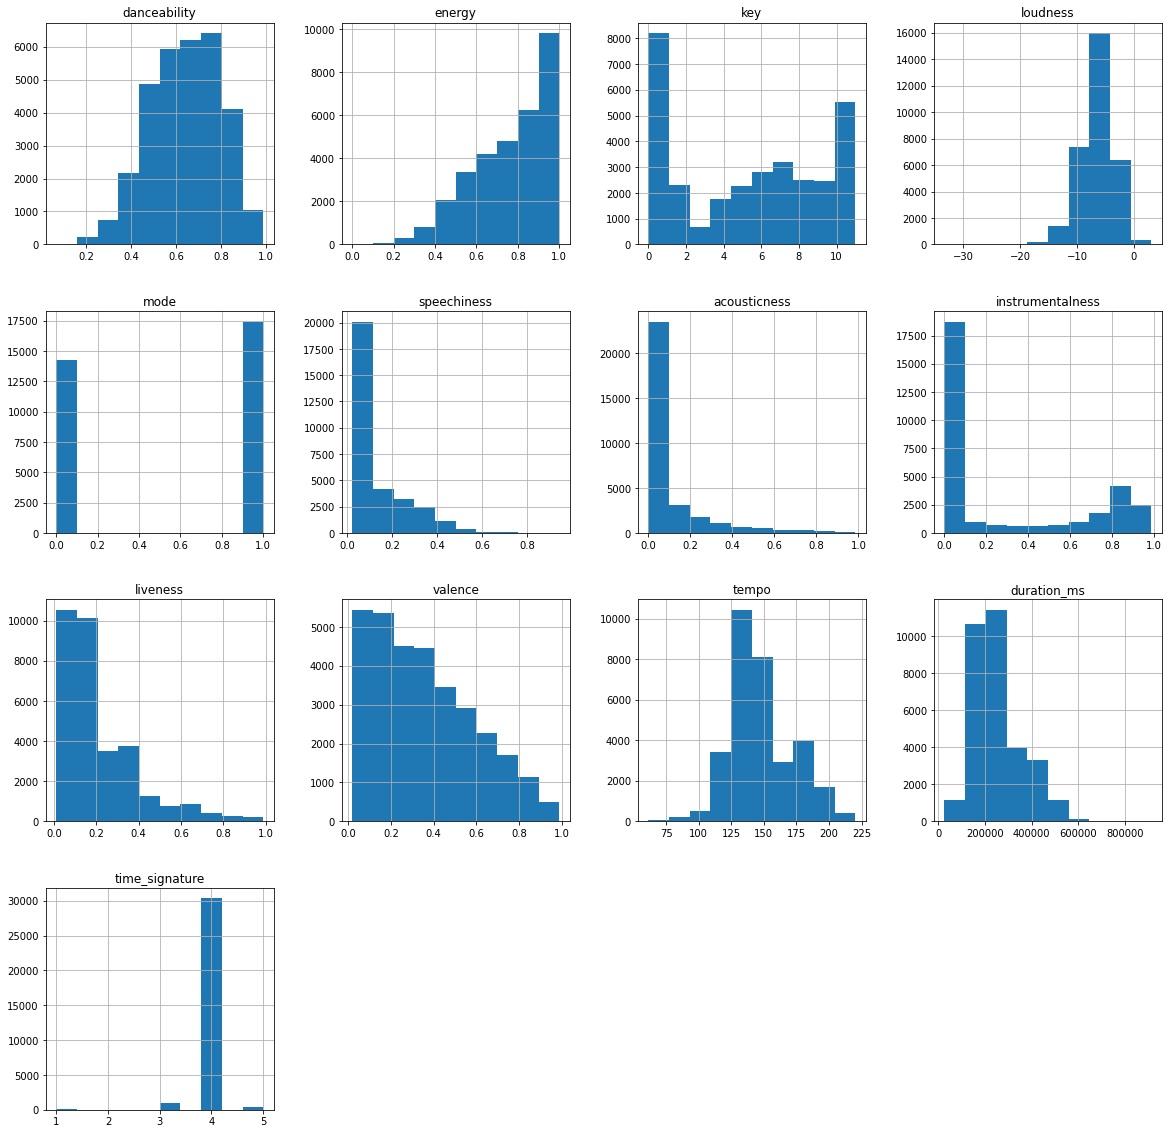

In [ ]:
train.hist(figsize=(20, 20))
plt.show()

In [ ]:
print(train.loc[train['time_signature'] == 1]["genre"])
print(train.loc[train['time_signature'] == 3]["genre"])
print(train.loc[train['time_signature'] == 5]["genre"])


1533                trap
2189              Hiphop
2313                 Rap
2496     Underground Rap
2566           Dark Trap
              ...       
30406          Dark Trap
30611    Underground Rap
30626                Pop
31224    Underground Rap
31463          Dark Trap
Name: genre, Length: 114, dtype: object
43        Dark Trap
56              Emo
60              Emo
103       psytrance
119       hardstyle
            ...    
31567     psytrance
31657        techno
31681           RnB
31695    Trap Metal
31717     Dark Trap
Name: genre, Length: 905, dtype: object
26             Dark Trap
98                   Rap
168      Underground Rap
215           Trap Metal
319            Dark Trap
              ...       
31354    Underground Rap
31378                Emo
31530                Rap
31594                RnB
31631                dnb
Name: genre, Length: 395, dtype: object


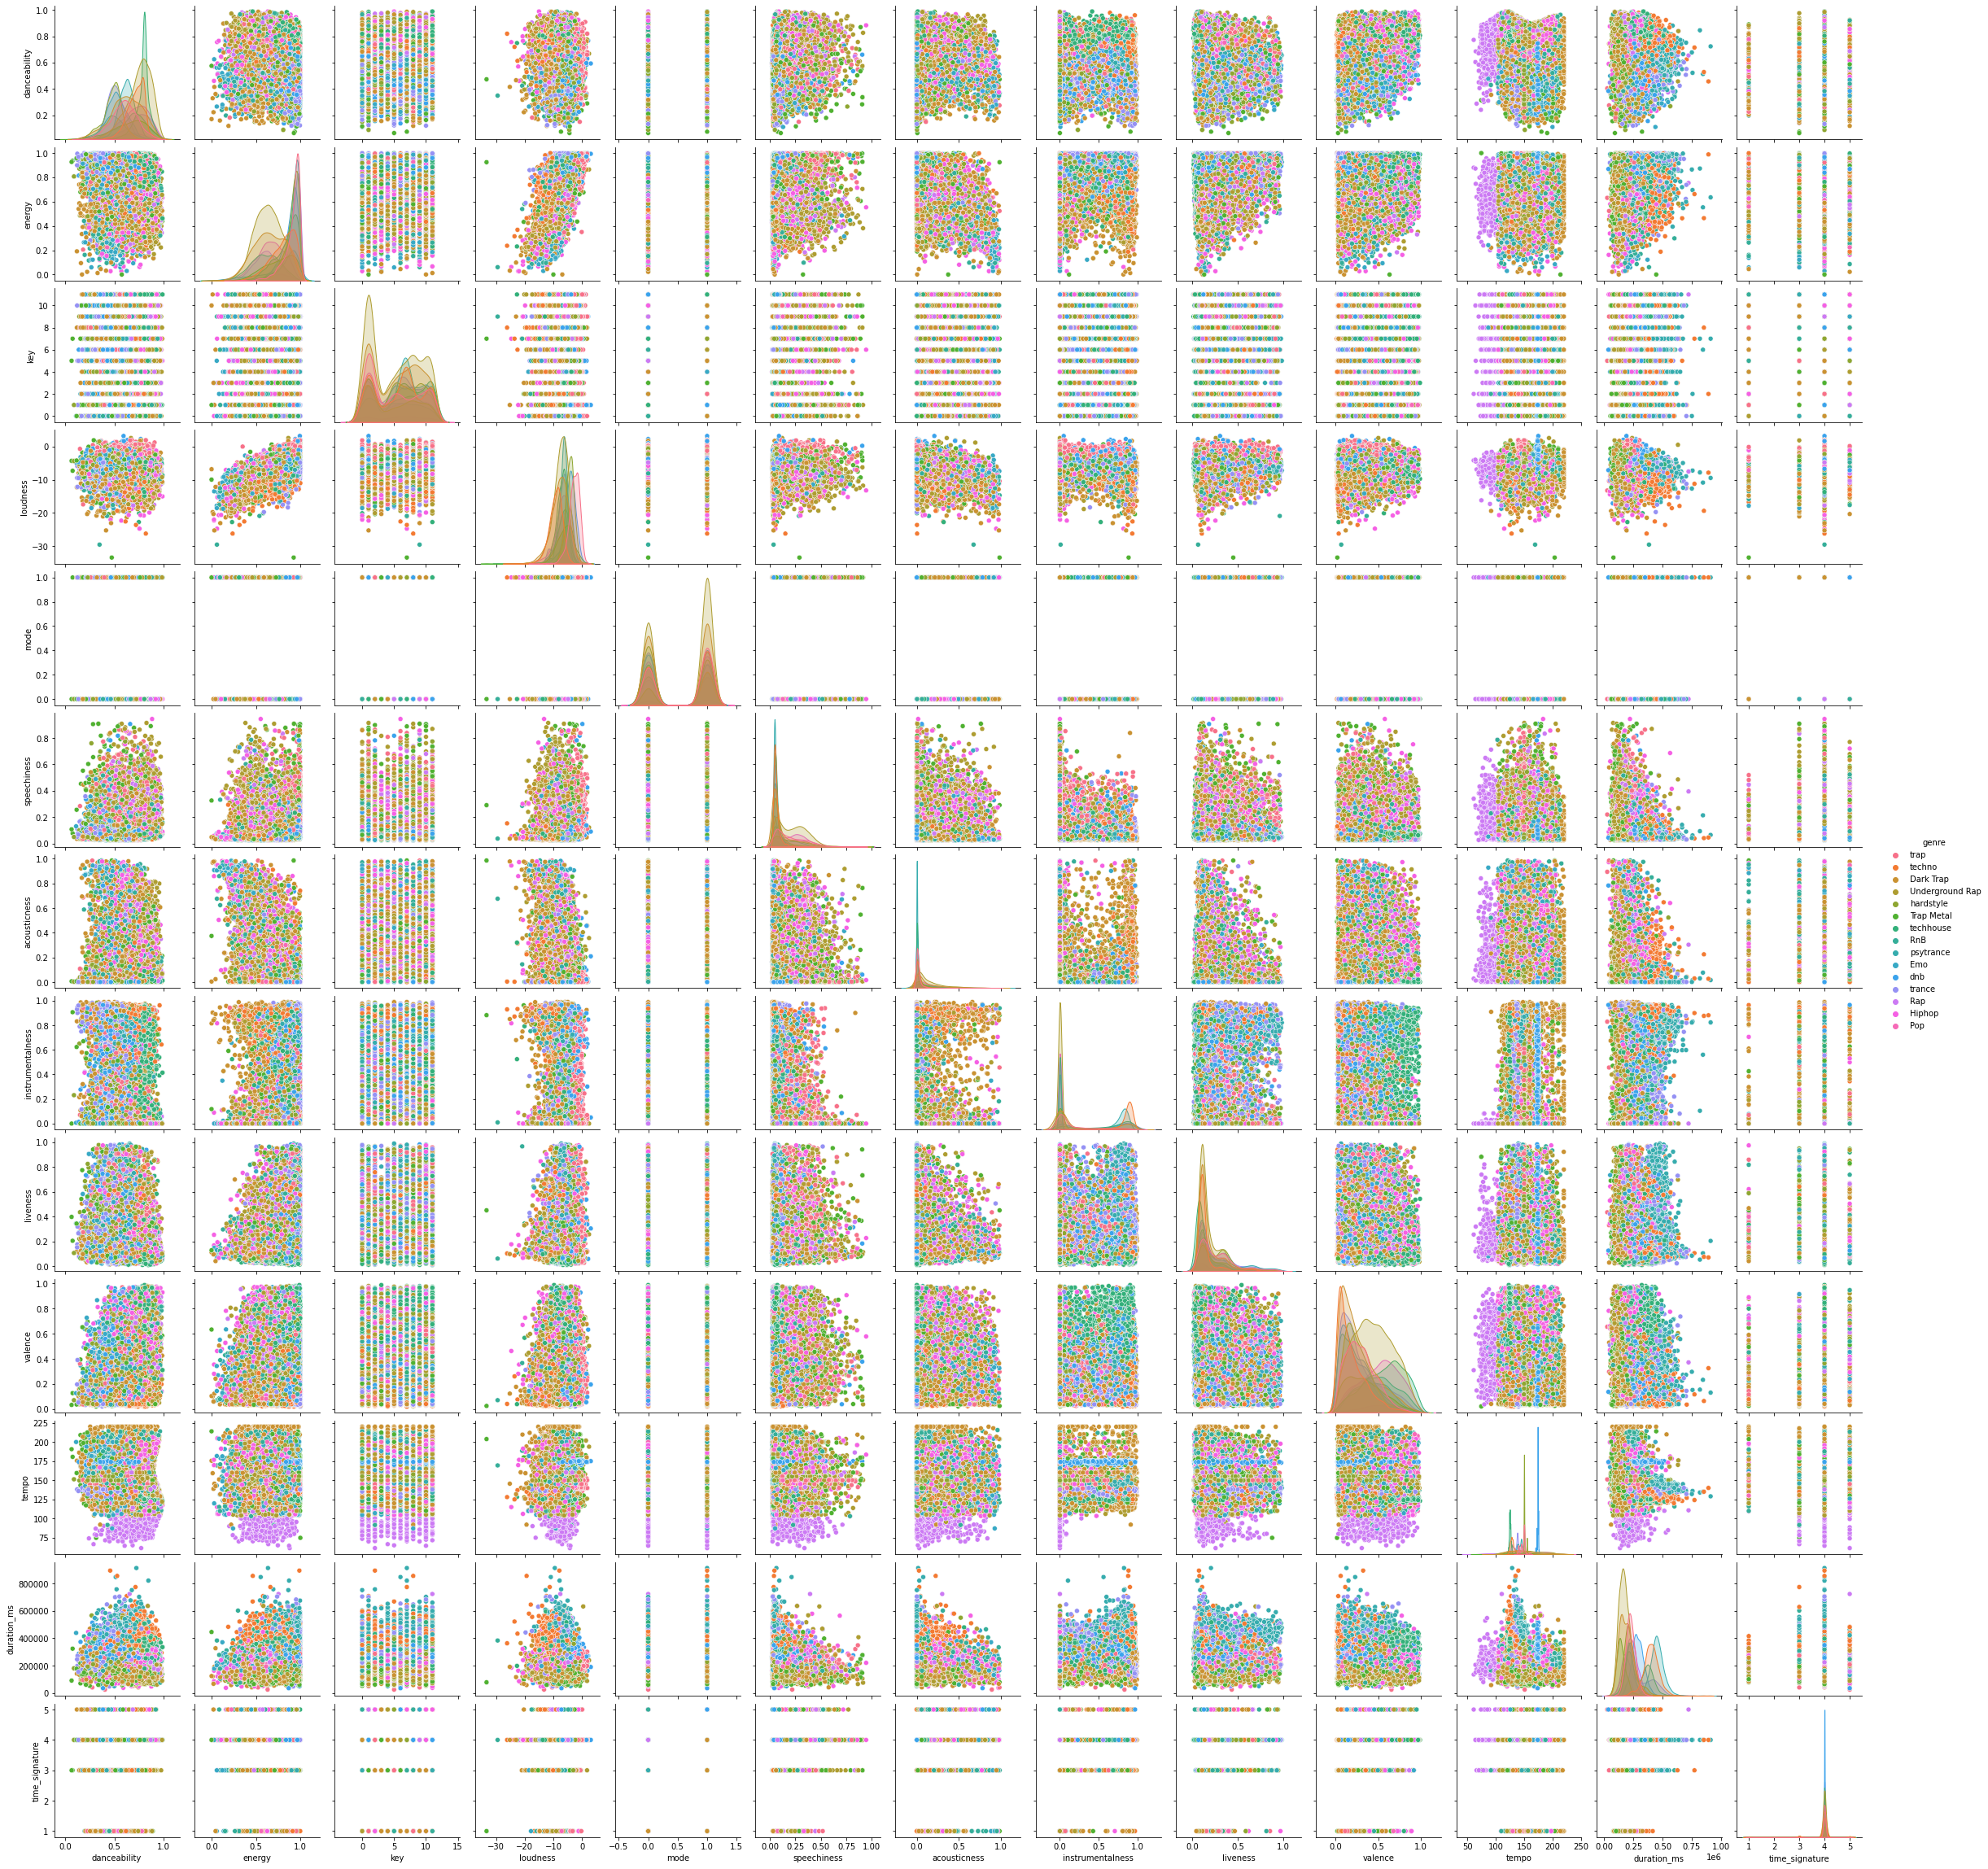

In [ ]:
sb.pairplot(train,hue='genre')

<AxesSubplot:>

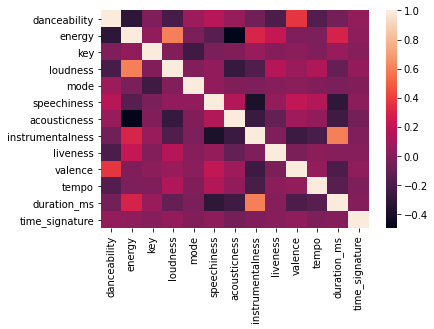

In [ ]:
sb.heatmap(train.corr())

## II) Classification

### Prétraitement

In [ ]:
le=sk.preprocessing.LabelEncoder()
genresEx1=train['genre'].to_numpy()
y=le.fit_transform(train['genre'])
X=train.drop('genre', axis=1).to_numpy()

scalerx=sk.preprocessing.StandardScaler().fit(X)
X=scalerx.transform(X)

scalertest=sk.preprocessing.StandardScaler().fit(test)
test=scalertest.transform(test)

In [ ]:
train["genre"].value_counts()

Underground Rap    4378
Dark Trap          3378
trance             2275
trap               2260
Hiphop             2255
techhouse          2254
techno             2226
psytrance          2214
dnb                2213
hardstyle          2178
RnB                1605
Trap Metal         1474
Rap                1420
Emo                1262
Pop                 336
Name: genre, dtype: int64

In [ ]:
skf=sk.model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
X_train,X_test,y_train,y_test=sk.model_selection.train_test_split(X,y)

### Fonction générale de classification

In [ ]:
def classification(classifier):
    classifier.fit(X_train,y_train)
    scoreKFOLD=skms.cross_val_score(classifier,X_train,y_train,scoring='f1_micro',cv=skf)
    print("F1_Micro sur les k-folds",scoreKFOLD,"\nMoyenne sur les k-folds",np.mean(scoreKFOLD),"\nF1_micro sur les données de test",classifier.score(X_test,y_test))
    return classifier.predict(X_test)

### Linear Models

#### Logistic Regression

In [ ]:
lr = sk.linear_model.LogisticRegression(random_state=0,max_iter=10000)
classification(lr)

F1_Micro sur les k-folds [0.60042017 0.56764706 0.5710084  0.57857143 0.57310924 0.5987395
 0.58301807 0.57797394 0.59142497 0.56410256] 
Moyenne sur les k-folds 0.5806015344347071 
F1_micro sur les données de test 0.5776601109430156


array([ 7,  4,  8, ..., 13,  7,  8])

In [ ]:
lr2=sk.linear_model.LogisticRegression(random_state=0,max_iter=10000,solver="liblinear")
classification(lr2)

F1_Micro sur les k-folds [0.55840336 0.55210084 0.56134454 0.56764706 0.57226891 0.54789916
 0.57587222 0.55065153 0.56788567 0.54476671] 
Moyenne sur les k-folds 0.5598839989968244 
F1_micro sur les données de test 0.5684568835098336


array([13,  2,  8, ...,  0,  7,  7])

In [ ]:
lr3=sk.linear_model.LogisticRegression(random_state=0,max_iter=10000,solver="newton-cg")
classification(lr3)

F1_Micro sur les k-folds [0.57478992 0.57226891 0.57983193 0.58361345 0.59327731 0.56806723
 0.59058428 0.57881463 0.5851198  0.56578394] 
Moyenne sur les k-folds 0.5792151387667299 
F1_micro sur les données de test 0.5847201210287444


array([13,  2,  8, ...,  0, 11,  7])

In [ ]:
lr4=sk.linear_model.LogisticRegression(random_state=0,max_iter=10000,solver="sag")
classification(lr4)

F1_Micro sur les k-folds [0.57478992 0.57226891 0.57983193 0.58361345 0.59327731 0.56806723
 0.59058428 0.57881463 0.5851198  0.56578394] 
Moyenne sur les k-folds 0.5792151387667299 
F1_micro sur les données de test 0.5847201210287444


array([13,  2,  8, ...,  0, 11,  7])

In [ ]:
lr5=sk.linear_model.LogisticRegression(random_state=0,max_iter=10000,solver="saga")
classification(lr5)

F1_Micro sur les k-folds [0.57478992 0.57226891 0.57983193 0.58361345 0.59327731 0.56806723
 0.59058428 0.57881463 0.5851198  0.56578394] 
Moyenne sur les k-folds 0.5792151387667299 
F1_micro sur les données de test 0.5847201210287444


array([13,  2,  8, ...,  0, 11,  7])

#### Stochastic Gradient Descent

In [ ]:
sgd=sklin.SGDClassifier(random_state=0, shuffle=True,n_jobs=-1,loss='hinge')
classification(sgd)

F1_Micro sur les k-folds [0.49957983 0.47983193 0.50588235 0.50294118 0.50042017 0.49243697
 0.47330811 0.48507776 0.51029844 0.47246742] 
Moyenne sur les k-folds 0.49222441814052226 
F1_micro sur les données de test 0.4934442763489662


array([13,  7,  8, ..., 12,  4,  7])

In [ ]:
sgd2=sklin.SGDClassifier(random_state=0, shuffle=True,n_jobs=-1,loss='perceptron')
classification(sgd2)

F1_Micro sur les k-folds [0.4012605  0.3907563  0.36344538 0.38361345 0.43907563 0.39327731
 0.45271122 0.40605296 0.46195881 0.3715847 ] 
Moyenne sur les k-folds 0.40637362637362645 
F1_micro sur les données de test 0.339006555723651


array([13,  2, 14, ..., 12,  7,  7])

In [ ]:
sgd3=sklin.SGDClassifier(random_state=0, shuffle=True,n_jobs=-1,loss='log')
classification(sgd3)

F1_Micro sur les k-folds [0.53865546 0.54495798 0.54159664 0.5605042  0.55546218 0.52352941
 0.55779739 0.55359395 0.54812947 0.53846154] 
Moyenne sur les k-folds 0.5462688227876271 
F1_micro sur les données de test 0.5545890065557236


array([13,  2,  8, ...,  0, 14,  0])

In [ ]:
sgd4=sklin.SGDClassifier(random_state=0, shuffle=True,n_jobs=-1,loss='modified_huber')
classification(sgd4)

F1_Micro sur les k-folds [0.5        0.51218487 0.49579832 0.4894958  0.50420168 0.51512605
 0.51282051 0.48171501 0.51786465 0.46616225] 
Moyenne sur les k-folds 0.49953691438744474 
F1_micro sur les données de test 0.49798285426122035


array([13,  2,  8, ...,  0,  7,  7])

In [ ]:
sgd5=sklin.SGDClassifier(random_state=0, shuffle=True,n_jobs=-1,loss='squared_hinge',max_iter=10000)
classification(sgd5)

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
F1_Micro sur les k-folds [0.51638655 0.51344538 0.4907563  0.49747899 0.51302521 0.49033613
 0.4863388  0.47751156 0.49516604 0.48717949] 
Moyenne sur les k-folds 0.4967624452050681 
F1_micro sur les données de test 0.501386787695411


array([13, 14,  8, ..., 12,  7,  7])

### Discriminant Analysis

#### LDA

In [ ]:
LDA = sk.discriminant_analysis.LinearDiscriminantAnalysis()
classification(LDA)

F1_Micro sur les k-folds [0.52857143 0.53487395 0.51932773 0.5407563  0.51596639 0.52268908
 0.5220681  0.51071879 0.54308533 0.5220681 ] 
Moyenne sur les k-folds 0.5260125185004646 
F1_micro sur les données de test 0.5263489662128089


array([13,  9, 12, ..., 10,  7,  7])

In [ ]:
LDA2 = sk.discriminant_analysis.LinearDiscriminantAnalysis(solver="lsqr")
classification(LDA2)

F1_Micro sur les k-folds [0.5302521  0.52983193 0.52394958 0.52142857 0.53361345 0.5092437
 0.53762085 0.5136612  0.52837327 0.50315259] 
Moyenne sur les k-folds 0.5231127230211126 
F1_micro sur les données de test 0.5301311144730206


array([13, 14,  8, ...,  0,  4,  7])

In [ ]:
LDA3 = sk.discriminant_analysis.LinearDiscriminantAnalysis(solver="eigen")
classification(LDA3)

F1_Micro sur les k-folds [0.5302521  0.52983193 0.52394958 0.52142857 0.53361345 0.5092437
 0.53762085 0.5136612  0.52837327 0.50315259] 
Moyenne sur les k-folds 0.5231127230211126 
F1_micro sur les données de test 0.5301311144730206


array([13, 14,  8, ...,  0,  4,  7])

#### QDA

In [ ]:
QDA = sk.discriminant_analysis.QuadraticDiscriminantAnalysis()
classification(QDA)

F1_Micro sur les k-folds [0.60336134 0.61890756 0.60168067 0.61302521 0.61806723 0.62394958
 0.6321984  0.60025221 0.60949979 0.61706599] 
Moyenne sur les k-folds 0.6138007990081279 
F1_micro sur les données de test 0.6094301563287947


array([13, 13, 12, ..., 10,  5,  7])

### Bayes Naive

In [ ]:
NB=sk.naive_bayes.GaussianNB()
classification(NB)

F1_Micro sur les k-folds [0.60840336 0.58277311 0.60168067 0.58781513 0.59201681 0.60672269
 0.5851198  0.59142497 0.59773014 0.59730979] 
Moyenne sur les k-folds 0.5950996464159434 
F1_micro sur les données de test 0.5814422592032275


array([13,  7,  1, ...,  1, 10,  7])

In [ ]:
BNB=sk.naive_bayes.BernoulliNB(alpha=50)
classification(BNB)

F1_Micro sur les k-folds [0.4697479  0.4605042  0.4605042  0.45336134 0.48277311 0.46554622
 0.4627995  0.44850778 0.47288777 0.46069777] 
Moyenne sur les k-folds 0.4637329786895843 
F1_micro sur les données de test 0.47415532022188606


array([12,  2, 14, ...,  0, 14,  7])

### Decision Tree

In [ ]:
decisionTree = sk.tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
classification(decisionTree)

F1_Micro sur les k-folds [0.56386555 0.57226891 0.56722689 0.57857143 0.57394958 0.57478992
 0.56788567 0.55611602 0.57040773 0.5615805 ] 
Moyenne sur les k-folds 0.568666218063518 
F1_micro sur les données de test 0.5671961674230963


array([ 0,  5,  5, ...,  0, 10,  0])

In [ ]:
decisionTree2 = sk.tree.DecisionTreeClassifier(criterion='gini',random_state=0)
classification(decisionTree2)

F1_Micro sur les k-folds [0.57731092 0.56848739 0.57226891 0.56554622 0.56806723 0.56512605
 0.56830601 0.5767129  0.57124842 0.56494325] 
Moyenne sur les k-folds 0.5698017315375078 
F1_micro sur les données de test 0.5621533030761473


array([ 7,  7,  5, ...,  0, 10,  2])

### Support Vector Machine

In [ ]:
svc=svm.SVC(random_state=0)
classification(svc)

F1_Micro sur les k-folds [0.65252101 0.6407563  0.65462185 0.65294118 0.64957983 0.64495798
 0.64943253 0.6443884  0.64144599 0.64985288] 
Moyenne sur les k-folds 0.6480497949495057 
F1_micro sur les données de test 0.6327534039334342


array([ 0,  7,  5, ...,  0, 10,  0])

In [ ]:
svc2=svm.SVC(random_state=0,kernel='linear')
classification(svc2)

F1_Micro sur les k-folds [0.64915966 0.61806723 0.63067227 0.62941176 0.62310924 0.63151261
 0.62421185 0.62295082 0.63640185 0.62673392] 
Moyenne sur les k-folds 0.6292231217833918 
F1_micro sur les données de test 0.6156076651538074


array([ 0,  7,  1, ...,  0, 10,  0])

In [ ]:
svc3=svm.SVC(random_state=0,kernel='sigmoid')
classification(svc3)

F1_Micro sur les k-folds [0.49285714 0.45630252 0.47058824 0.47436975 0.47268908 0.48907563
 0.46784363 0.46784363 0.46574191 0.4779319 ] 
Moyenne sur les k-folds 0.4735243429023564 
F1_micro sur les données de test 0.46659102370146244


array([ 0,  0,  1, ...,  0, 10,  0])

In [ ]:
svc4=svm.SVC(random_state=0,kernel='poly')
classification(svc4)

F1_Micro sur les k-folds [0.62815126 0.62016807 0.63403361 0.63739496 0.62857143 0.62563025
 0.63472047 0.62631358 0.62295082 0.6321984 ] 
Moyenne sur les k-folds 0.6290132850113564 
F1_micro sur les données de test 0.623171961674231


array([ 0,  7,  7, ...,  0, 10,  0])

#### Linear SVC

In [ ]:
linsvc=svm.LinearSVC(random_state=0, max_iter=10000)
classification(linsvc)

F1_Micro sur les k-folds [0.56596639 0.54957983 0.55378151 0.55504202 0.55630252 0.56008403
 0.5493905  0.55779739 0.55863808 0.55989912] 
Moyenne sur les k-folds 0.5566481397098563 
F1_micro sur les données de test 0.5452597075138679


array([13,  7,  1, ...,  0, 10,  8])

In [ ]:
linsvc2=svm.LinearSVC(random_state=0, maxz_iter=10000,dual=False)
classification(linsvc2)

F1_Micro sur les k-folds [0.56596639 0.54957983 0.55378151 0.55504202 0.55630252 0.56008403
 0.5493905  0.55779739 0.55863808 0.55989912] 
Moyenne sur les k-folds 0.5566481397098563 
F1_micro sur les données de test 0.5452597075138679


array([13,  7,  1, ...,  0, 10,  8])

### KNN-Classifier

In [ ]:
knn=skn.KNeighborsClassifier(n_neighbors=30, weights="distance")
classification(knn)

F1_Micro sur les k-folds [0.58151261 0.58235294 0.56932773 0.56302521 0.57184874 0.57731092
 0.56578394 0.57377049 0.5729298  0.58049601] 
Moyenne sur les k-folds 0.573835839506042 
F1_micro sur les données de test 0.5677004538577912


array([ 0,  7,  5, ...,  0, 10,  5])

### Réseaux de neurones

#### Modèle

In [ ]:
num_classes=len(np.unique(y))
dimension=X.shape[1]
input_shape=(dimension,)

y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

model=tf.keras.Sequential([
tf.keras.Input(shape=input_shape),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(num_classes,activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                975       
Total params: 10,191
Trainable params: 10,191
Non-trainable params: 0
____________________________________________________

#### Fitting

In [ ]:
batch_size = 128
epochs = 150
from time import time

t0=time()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True)

t1=time()
print(t1-t0)

Epoch 1/150
168/168 [==============================] - 1s 4ms/step - loss: 2.1930 - accuracy: 0.2951 - val_loss: 1.3760 - val_accuracy: 0.5269
Epoch 2/150
168/168 [==============================] - 0s 3ms/step - loss: 1.3507 - accuracy: 0.5367 - val_loss: 1.2242 - val_accuracy: 0.5756
Epoch 3/150
168/168 [==============================] - 0s 2ms/step - loss: 1.2172 - accuracy: 0.5789 - val_loss: 1.1485 - val_accuracy: 0.5891
Epoch 4/150
168/168 [==============================] - 0s 3ms/step - loss: 1.1458 - accuracy: 0.5980 - val_loss: 1.1024 - val_accuracy: 0.6118
Epoch 5/150
168/168 [==============================] - 0s 2ms/step - loss: 1.1217 - accuracy: 0.6034 - val_loss: 1.0768 - val_accuracy: 0.6151
Epoch 6/150
168/168 [==============================] - 0s 2ms/step - loss: 1.0945 - accuracy: 0.6165 - val_loss: 1.0608 - val_accuracy: 0.6147
Epoch 7/150
168/168 [==============================] - 0s 2ms/step - loss: 1.0727 - accuracy: 0.6206 - val_loss: 1.0489 - val_accuracy: 0.6210

#### Prediction

In [ ]:
score = model.evaluate(X_test, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.9100649952888489
Test accuracy: 0.6746091842651367


#### Confusion Matrix

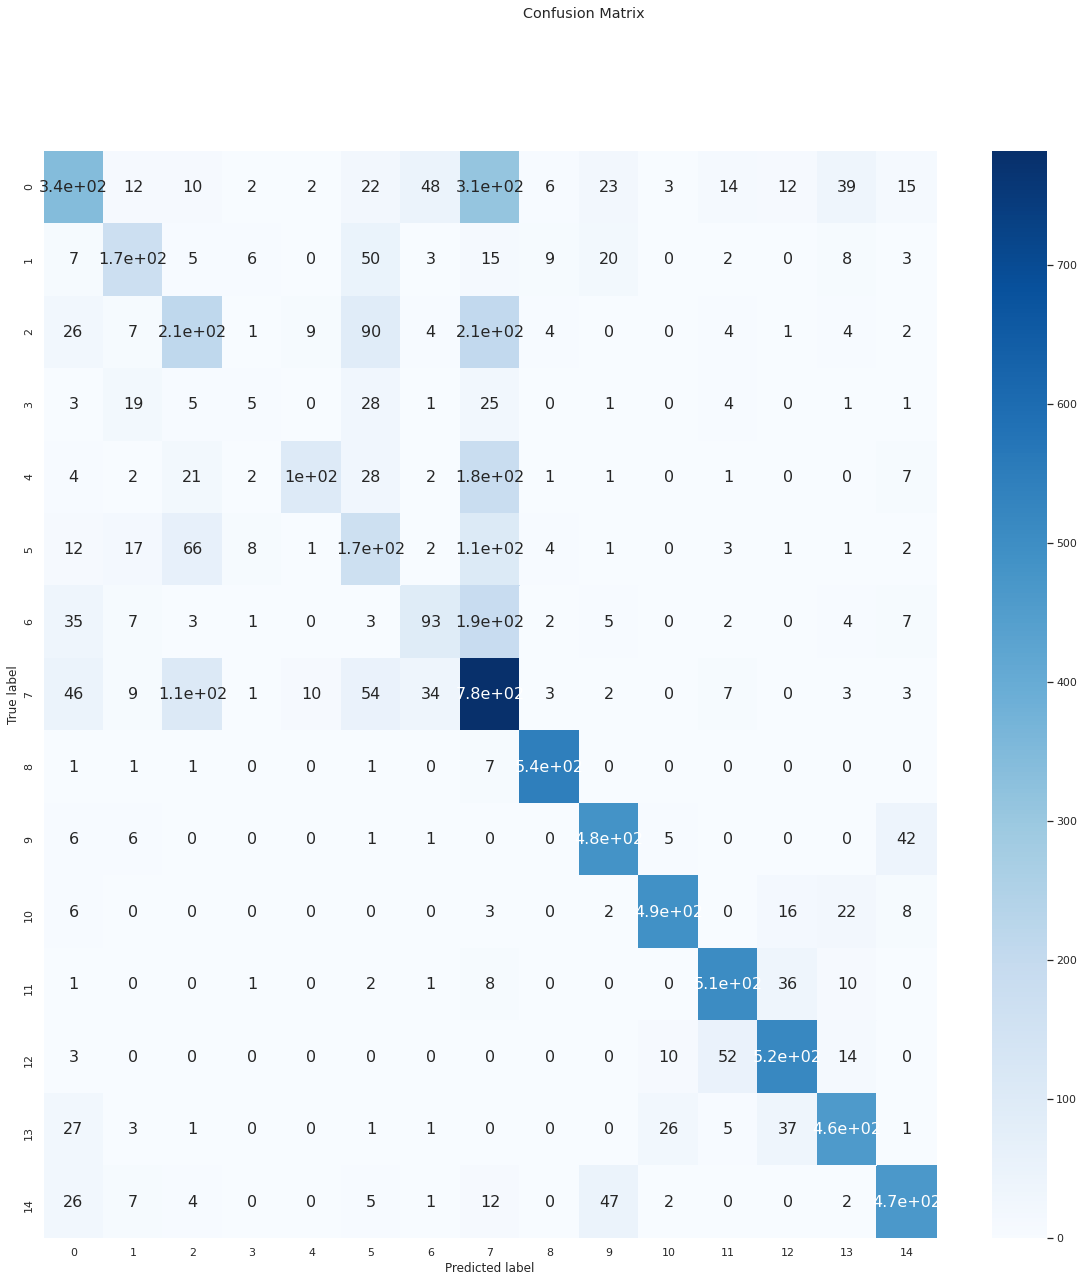

In [ ]:
y_pred=model.predict(X_test.reshape((X_test.shape[0], -1)))

conf_mat=tf.math.confusion_matrix(labels=y_test,predictions=np.argmax(y_pred, axis=-1), num_classes=len(np.unique(y_test)), weights=None, dtype=tf.dtypes.int32,name=None)

fig = plt.figure(figsize=(20,20))
df_cm = pd.DataFrame(conf_mat.numpy(), range(conf_mat.shape[0]), range(conf_mat.shape[1]))
sb.set(font_scale=1)
sb.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap='Blues') 

plt.suptitle('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.show()

### Ensemble Methods

#### Random Forest

In [ ]:
forest=ens.RandomForestClassifier(random_state=0)
classification(forest)

F1_Micro sur les k-folds [0.67142857 0.67226891 0.66134454 0.66134454 0.66680672 0.65798319
 0.66078184 0.66204288 0.66750736 0.67297184] 
Moyenne sur les k-folds 0.6654480379793785 
F1_micro sur les données de test 0.6510337871911246


array([ 0,  7,  5, ...,  6, 10,  0])

In [ ]:
forest2=ens.RandomForestClassifier(random_state=0,criterion="entropy")
classification(forest2)

F1_Micro sur les k-folds [0.66554622 0.6710084  0.66134454 0.65798319 0.66596639 0.66596639
 0.65615805 0.65783943 0.67002942 0.66960908] 
Moyenne sur les k-folds 0.6641451107555254 
F1_micro sur les données de test 0.6478819969742814


array([ 0,  7,  5, ...,  6, 10,  0])

In [ ]:
forest3=ens.RandomForestClassifier(random_state=0,n_estimators=500)
classification(forest3)

F1_Micro sur les k-folds [0.67815126 0.68067227 0.6697479  0.66260504 0.66848739 0.67142857
 0.66456494 0.66246322 0.67339218 0.67927701] 
Moyenne sur les k-folds 0.671078978880329 
F1_micro sur les données de test 0.6559505799293999


array([ 0,  7,  5, ...,  0, 10,  0])

#### Bagging Classifier

In [ ]:
bag=ens.BaggingClassifier(base_estimator=svc)
classification(bag)

F1_Micro sur les k-folds [0.65714286 0.64201681 0.65378151 0.6512605  0.64705882 0.65084034
 0.65027322 0.64228668 0.64943253 0.65657839] 
Moyenne sur les k-folds 0.650067166841516 
F1_micro sur les données de test 0.6391830559757943


array([ 0,  7,  5, ...,  0, 10,  0])

In [ ]:
bag=ens.BaggingClassifier()
classification(bag)

F1_Micro sur les k-folds [0.64243697 0.63865546 0.62563025 0.62857143 0.62184874 0.63487395
 0.62211013 0.62631358 0.6359815  0.63177806] 
Moyenne sur les k-folds 0.630820007700432 
F1_micro sur les données de test 0.6186333837619769


array([ 0,  7,  5, ...,  0, 10,  0])

#### AdaBoost

In [ ]:
ada=ens.AdaBoostClassifier(random_state=0)
classification(ada)

F1_Micro sur les k-folds [0.32983193 0.35882353 0.3802521  0.35504202 0.40168067 0.41008403
 0.38965952 0.39218159 0.37957125 0.3001261 ] 
Moyenne sur les k-folds 0.3697252747252747 
F1_micro sur les données de test 0.3813666162380232


array([ 0,  7,  7, ...,  2, 13,  2])

In [ ]:
ada2=ens.AdaBoostClassifier(random_state=0,learning_rate=0.1)
classification(ada2)

F1_Micro sur les k-folds [0.41092437 0.38823529 0.38151261 0.40966387 0.3987395  0.40294118
 0.41025641 0.37873056 0.38629676 0.39176124] 
Moyenne sur les k-folds 0.3959061783603731 
F1_micro sur les données de test 0.3923348461926374


array([ 0,  7,  7, ...,  7, 10,  7])

In [ ]:
ada2=ens.AdaBoostClassifier(random_state=0,learning_rate=0.1, n_estimators=100)
classification(ada2)

F1_Micro sur les k-folds [0.40588235 0.39411765 0.39579832 0.40462185 0.39705882 0.40798319
 0.4035309  0.3875578  0.41319882 0.39638504] 
Moyenne sur les k-folds 0.40061347363661737 
F1_micro sur les données de test 0.3927130610186586


array([ 0,  7,  7, ...,  0, 10,  7])

#### Gradient Boosting

In [ ]:
grad=ens.GradientBoostingClassifier(random_state=1,learning_rate=0.1,n_estimators=100)
classification(grad)

F1_Micro sur les k-folds [0.68613445 0.67941176 0.67815126 0.67352941 0.67815126 0.6802521
 0.67675494 0.67549391 0.6876839  0.69777217] 
Moyenne sur les k-folds 0.6813335170133629 
F1_micro sur les données de test 0.6758698940998488


array([ 0,  7,  5, ...,  6, 10,  0])

### Conclusion

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


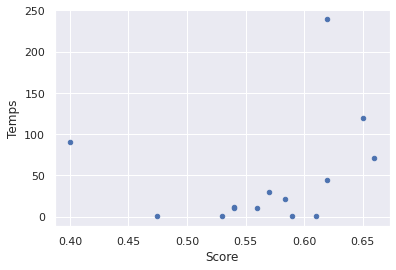

In [ ]:
conc = {'Algorithme': ["Logistic Regression", "Stochastic Gradient Descent","LDA","QDA","GaussianNB","BernoulliNB","DecisionTree","SVC","LinearSVC","KNN","CNN","RandomForest","Bagging","AdaBoost"], 'Score': [0.584, 0.54,0.53,0.61,0.59,0.474,0.56, 0.62,0.54,0.57,0.66,0.65,0.62,0.4], 'Temps':[21,12,1,1.3,0.3,0.7,10,240,10,30,71,120,45,90]}
conclusion= pd.DataFrame(data=conc)
conclusion.set_index("Algorithme")
conclusion.plot.scatter(x="Score",y="Temps")

# Exercice 2

## Pré-traitement

In [ ]:
ex2.head()

mode                  genres  acousticness  ...   valence  popularity  key
0     1  21st century classical      0.979333  ...  0.103783   27.833333    6
1     1                   432hz      0.494780  ...  0.221750   52.500000    5
2     1                   8-bit      0.762000  ...  0.975000   48.000000    7
3     1                      []      0.651417  ...  0.513604   20.859882    7
4     1              a cappella      0.676557  ...  0.448249   45.820071    7

[5 rows x 14 columns]

In [ ]:
ex2.describe()

mode  acousticness  ...   popularity          key
count  2973.000000   2973.000000  ...  2973.000000  2973.000000
mean      0.833165      0.401241  ...    39.919185     5.938782
std       0.372891      0.319760  ...    16.748723     3.368110
min       0.000000      0.000003  ...     0.000000     0.000000
25%       1.000000      0.119050  ...    32.491279     3.000000
50%       1.000000      0.321745  ...    43.056569     7.000000
75%       1.000000      0.673991  ...    51.138889     9.000000
max       1.000000      0.996000  ...    80.666667    11.000000

[8 rows x 13 columns]

### Valeurs Nulles

In [ ]:
for colonne in ex2.columns:
  print("Number of null values in column " + colonne + " : " +
         str(ex2[colonne].isnull().sum())) 

Number of null values in column mode : 0
Number of null values in column genres : 0
Number of null values in column acousticness : 0
Number of null values in column danceability : 0
Number of null values in column duration_ms : 0
Number of null values in column energy : 0
Number of null values in column instrumentalness : 0
Number of null values in column liveness : 0
Number of null values in column loudness : 0
Number of null values in column speechiness : 0
Number of null values in column tempo : 0
Number of null values in column valence : 0
Number of null values in column popularity : 0
Number of null values in column key : 0


### Traitement Genres

In [ ]:
g=np.unique(ex2["genres"])
print('Nombre de genres distincts : ',len(g))
print('Nombre de lignes : ',ex2.shape[0])
genres=ex2['genres'].to_numpy()
ex2SsGenre=ex2.drop('genres', axis=1)

Nombre de genres distincts :  2973
Nombre de lignes :  2973


## Visualisation

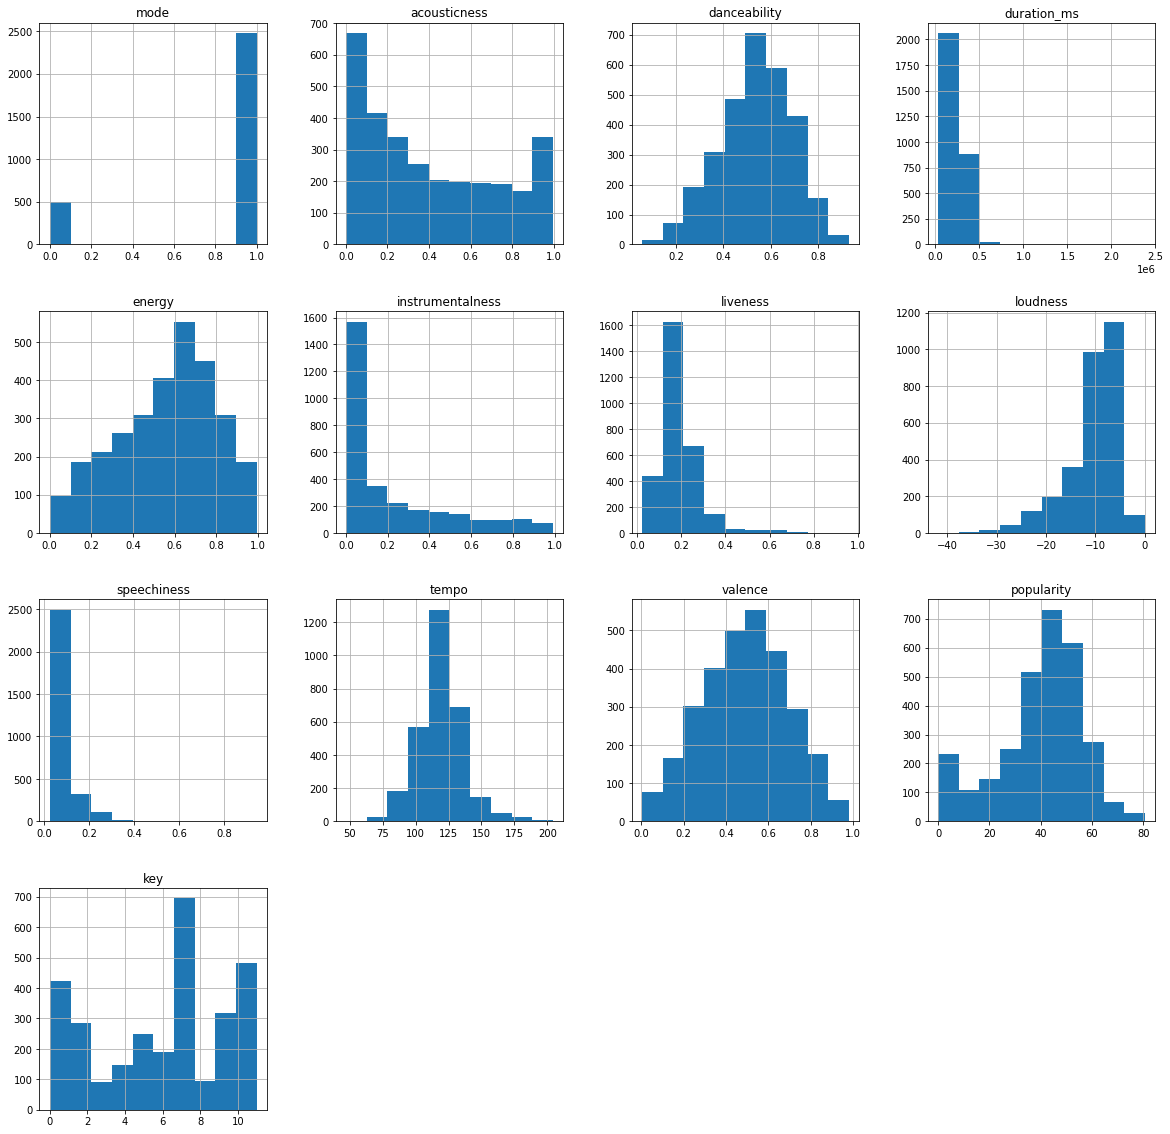

In [ ]:
ex2SsGenre.hist(figsize=(20, 20))
plt.show()

In [ ]:
ex2SsGenre.corr()

mode  acousticness  danceability  duration_ms    energy  \
mode              1.000000      0.077347     -0.071240    -0.053197 -0.080352   
acousticness      0.077347      1.000000     -0.324991    -0.014075 -0.868274   
danceability     -0.071240     -0.324991      1.000000    -0.160634  0.299780   
duration_ms      -0.053197     -0.014075     -0.160634     1.000000 -0.048158   
energy           -0.080352     -0.868274      0.299780    -0.048158  1.000000   
instrumentalness -0.012662      0.273739     -0.383102     0.229421 -0.324940   
liveness         -0.002650     -0.076570     -0.055147     0.018624  0.168233   
loudness         -0.063706     -0.737276      0.453062    -0.137574  0.848965   
speechiness      -0.059127     -0.086139      0.242052     0.033226  0.119791   
tempo            -0.042931     -0.397713      0.082869    -0.046840  0.430825   
valence          -0.010258     -0.178210      0.652546    -0.257517  0.305166   
popularity       -0.031231     -0.458698      0.217992    -0.071019  0.337795   
key              -0.060109     -0.078815      0.029551    -0.029309  0.097165   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
mode                     -0.012662 -0.002650 -0.063706    -0.059127 -0.042931   
acousticness              0.273739 -0.076570 -0.737276    -0.086139 -0.397713   
danceability             -0.383102 -0.055147  0.453062     0.242052  0.082869   
duration_ms               0.229421  0.018624 -0.137574     0.033226 -0.046840   
energy                   -0.324940  0.168233  0.848965     0.119791  0.430825   
instrumentalness          1.000000 -0.050615 -0.537669    -0.196763 -0.201663   
liveness                 -0.050615  1.000000  0.123946     0.190136  0.002285   
loudness                 -0.537669  0.123946  1.000000     0.095298  0.407985   
speechiness              -0.196763  0.190136  0.095298     1.000000  0.001446   
tempo                    -0.201663  0.002285  0.407985     0.001446  1.000000   
valence                  -0.424091  0.000730  0.376577     0.092680  0.139589   
popularity               -0.265449 -0.094178  0.344361    -0.045217  0.146717   
key                      -0.069317  0.007308  0.082991     0.022326  0.081608   

                   valence  popularity       key  
mode             -0.010258   -0.031231 -0.060109  
acousticness     -0.178210   -0.458698 -0.078815  
danceability      0.652546    0.217992  0.029551  
duration_ms      -0.257517   -0.071019 -0.029309  
energy            0.305166    0.337795  0.097165  
instrumentalness -0.424091   -0.265449 -0.069317  
liveness          0.000730   -0.094178  0.007308  
loudness          0.376577    0.344361  0.082991  
speechiness       0.092680   -0.045217  0.022326  
tempo             0.139589    0.146717  0.081608  
valence           1.000000    0.023072  0.063637  
popularity        0.023072    1.000000  0.008577  
key               0.063637    0.008577  1.000000

<AxesSubplot:>

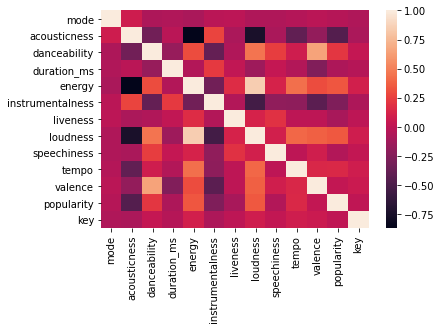

In [ ]:
sb.heatmap(ex2SsGenre.corr())

## Régression

In [ ]:
y2=ex2SsGenre["popularity"].to_numpy()
ex2SsGenreSspopularity=ex2SsGenre.drop("popularity", axis=1)
X2=ex2SsGenreSspopularity.to_numpy()
scaler2=sk.preprocessing.StandardScaler().fit(X2)
X2=scaler2.transform(X2)
colonnes=ex2SsGenreSspopularity.columns

In [ ]:
skf=skms.KFold(n_splits=5, shuffle=True, random_state=0)
X_train2,X_test2,y_train2,y_test2=skms.train_test_split(X2,y2)

In [ ]:
def regression(regressor):
    regressor.fit(X_train2,y_train2)
    scoreKFOLD=skms.cross_val_score(regressor,X_train2,y_train2,scoring='r2',cv=skf)
    print("r2 sur les k-folds",scoreKFOLD,"\nMoyenne sur les k-folds",np.mean(scoreKFOLD),"\nr2 sur les données de test",regressor.score(X_test2,y_test2))

### Regression linéaire

In [ ]:
lin= sklin.LinearRegression()
regression(lin)

r2 sur les k-folds [0.24260089 0.2445427  0.29030959 0.24805581 0.30265803] 
Moyenne sur les k-folds 0.26563340200545726 
r2 sur les données de test 0.3329767236211695


In [ ]:
ridge= sklin.Ridge(alpha=10,random_state=0)
regression(ridge)

r2 sur les k-folds [0.24235545 0.24580934 0.29081417 0.24860595 0.30316031] 
Moyenne sur les k-folds 0.26614904431073094 
r2 sur les données de test 0.3328392932737463


In [ ]:
bayridge=sklin.BayesianRidge(alpha_1=0.0001,alpha_2=0.0001)
regression(bayridge)

r2 sur les k-folds [0.28635339 0.30350099 0.32028289 0.2460347  0.29030972] 
Moyenne sur les k-folds 0.28929633758772216 
r2 sur les données de test 0.2700481773568856


In [ ]:
lasso= sklin.Lasso(alpha=0.1,random_state=0)
regression(lasso)

r2 sur les k-folds [0.24047183 0.25142154 0.29282979 0.24967218 0.3029323 ] 
Moyenne sur les k-folds 0.267465528013345 
r2 sur les données de test 0.33121147198727197


In [ ]:
lars=sklin.LassoLars(alpha=0.0001,random_state=0)
regression(lars)

r2 sur les k-folds [0.24265946 0.24488392 0.29045053 0.24816057 0.3026557 ] 
Moyenne sur les k-folds 0.2657620398314945 
r2 sur les données de test 0.3329441950669255


In [ ]:
sgdr=sklin.SGDRegressor(random_state=0,shuffle=True)
regression(sgdr)

r2 sur les k-folds [0.23975578 0.24846976 0.28864912 0.24618405 0.3061136 ] 
Moyenne sur les k-folds 0.26583446153058327 
r2 sur les données de test 0.33948855462274186


### Support Vector Machine

In [ ]:
svr= svm.SVR()
regression(svr)

r2 sur les k-folds [0.40181572 0.40977182 0.3953186  0.33960401 0.40689471] 
Moyenne sur les k-folds 0.39068097018695774 
r2 sur les données de test 0.4308211181328808


In [ ]:
svr2= svm.SVR(kernel='linear')
regression(svr2)

r2 sur les k-folds [0.1973461  0.27073256 0.23407531 0.16562379 0.30958587] 
Moyenne sur les k-folds 0.23547272432747923 
r2 sur les données de test 0.2979686587634429


In [ ]:
svr3= svm.SVR(kernel='sigmoid')
regression(svr3)

r2 sur les k-folds [-1.56672185 -1.0487417  -0.70752915 -1.01697097 -0.9522942 ] 
Moyenne sur les k-folds -1.058451574587648 
r2 sur les données de test -1.9204691679242831


In [ ]:
svr4= svm.SVR(kernel='poly', degree=1)
regression(svr4)

r2 sur les k-folds [0.19239843 0.27386109 0.24407149 0.17295429 0.30096364] 
Moyenne sur les k-folds 0.23684978937256423 
r2 sur les données de test 0.2920633651397804


In [ ]:
linsvr=svm.LinearSVR()
regression(linsvr)

r2 sur les k-folds [0.19788864 0.26070724 0.24237532 0.16914465 0.30985486] 
Moyenne sur les k-folds 0.23599414162845841 
r2 sur les données de test 0.2981579969142155


### Nearest Neighbors

In [ ]:
neigh=skn.KNeighborsRegressor()
regression(neigh)

r2 sur les k-folds [0.40333169 0.47113722 0.47389239 0.49051805 0.43133925] 
Moyenne sur les k-folds 0.4540437188151582 
r2 sur les données de test 0.5000216235596853


In [ ]:
neigh2=skn.KNeighborsRegressor(n_neighbors=7, weights="distance")
regression(neigh2)

r2 sur les k-folds [0.46430681 0.50215601 0.53933425 0.51063748 0.50062542] 
Moyenne sur les k-folds 0.5034119925918292 
r2 sur les données de test 0.564986674376625


### Classifier Tree

In [ ]:
tree=skt.DecisionTreeRegressor(random_state=0)
regression(tree)

r2 sur les k-folds [-0.00577067  0.16395368  0.06069665  0.28496377  0.25264585] 
Moyenne sur les k-folds 0.15129785431891293 
r2 sur les données de test 0.17939976124277868


In [ ]:
tree=skt.DecisionTreeRegressor(random_state=0, criterion="friedman_mse")
regression(tree)

r2 sur les k-folds [-0.01377609  0.1096867   0.07413767  0.30808747  0.29706076] 
Moyenne sur les k-folds 0.15503930415842337 
r2 sur les données de test 0.24598221438102208


In [ ]:
tree=skt.DecisionTreeRegressor(random_state=0, criterion="poisson")
regression(tree)

r2 sur les k-folds [-0.01843354 -0.19221785 -0.22907922 -0.1851     -0.09777241] 
Moyenne sur les k-folds -0.1445206054260515 
r2 sur les données de test -0.16574312102249023


### Ensemble Methods

#### Forest

In [ ]:
forest=ens.RandomForestRegressor()
regression(forest)

r2 sur les k-folds [0.52032242 0.52142127 0.55920016 0.57769385 0.56081779] 
Moyenne sur les k-folds 0.547891098197369 
r2 sur les données de test 0.5940507002923163


In [ ]:
forest=ens.RandomForestRegressor(n_estimators=1000)
regression(forest) 

r2 sur les k-folds [0.52393098 0.53524658 0.56560855 0.58016332 0.56409815] 
Moyenne sur les k-folds 0.5538095143633197 
r2 sur les données de test 0.6096302859942229


#### Bagging

In [ ]:
bag=ens.BaggingRegressor()
regression(bag)

r2 sur les k-folds [0.47113011 0.51036561 0.53661511 0.56169186 0.51895223] 
Moyenne sur les k-folds 0.5197509822666844 
r2 sur les données de test 0.5443966316757702


In [ ]:
bag=ens.BaggingRegressor(n_estimators=100)
regression(bag)

r2 sur les k-folds [0.52453042 0.52997978 0.55713434 0.57626651 0.55707927] 
Moyenne sur les k-folds 0.5489980655872782 
r2 sur les données de test 0.6064885796179671


#### AdaBoost

In [ ]:
ada=ens.AdaBoostRegressor(n_estimators=1000, learning_rate=0.01)
regression(ada)

r2 sur les k-folds [0.33391647 0.35750217 0.38456511 0.38692502 0.3771324 ] 
Moyenne sur les k-folds 0.3680082335753081 
r2 sur les données de test 0.40862330121848056


#### Gradient Boosting

In [ ]:
grad=ens.GradientBoostingRegressor()
regression(grad)

r2 sur les k-folds [0.46670125 0.4763574  0.54210755 0.52915929 0.52332564] 
Moyenne sur les k-folds 0.5075302247159801 
r2 sur les données de test 0.5599209393713236


In [ ]:
grad=ens.GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1)
regression(grad)

r2 sur les k-folds [0.49580791 0.47890199 0.53413177 0.51218775 0.54630115] 
Moyenne sur les k-folds 0.5134661150265676 
r2 sur les données de test 0.58797495335568


### Neural Network

#### Modèle

In [ ]:
dimension=X2.shape[1]
input_shape=(dimension,)

model=tf.keras.Sequential([
tf.keras.Input(shape=input_shape),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1,activation='linear')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                416       
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


#### Fitting

In [ ]:
def r2(y_true, y_pred):
  SS_res =  Kbackend.sum(Kbackend.square( y_true-y_pred )) 
  SS_tot = Kbackend.sum(Kbackend.square( y_true - Kbackend.mean(y_true) ) ) 
  return ( 1 - SS_res/(SS_tot + Kbackend.epsilon()) )

batch_size = 64
epochs = 200

model.compile(loss="MSE", optimizer="adam", metrics=[r2])

model.fit(X_train2, y_train2, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True)

Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 1782.8389 - r2: -5.7731 - val_loss: 1793.1768 - val_r2: -6.8782
Epoch 2/200
32/32 [==============================] - 0s 2ms/step - loss: 1669.1404 - r2: -5.4849 - val_loss: 1543.1307 - val_r2: -5.7926
Epoch 3/200
32/32 [==============================] - 0s 2ms/step - loss: 1334.4270 - r2: -4.1279 - val_loss: 1134.9375 - val_r2: -4.0235
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 937.3742 - r2: -2.7129 - val_loss: 673.0106 - val_r2: -2.0110
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 551.0315 - r2: -1.1084 - val_loss: 394.2942 - val_r2: -0.7671
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 366.0223 - r2: -0.3399 - val_loss: 307.5667 - val_r2: -0.3565
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 301.3018 - r2: -0.1334 - val_loss: 278.1728 - val_r2: -0.2183
Epoch 8/200
32/32 [==============================

#### Score

In [ ]:
print(model.metrics_names)
score = model.evaluate(X_test2, y_test2, verbose=0)
print(score)

['loss', 'r2']
[141.26708984375, 0.4785101115703583]


### Récapitulatif

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


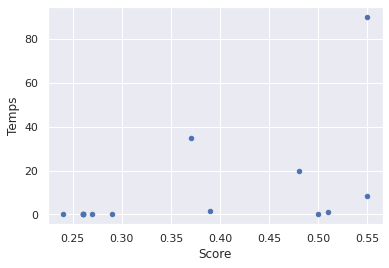

In [ ]:
recap = {'Algorithme': ["Linear Regression", "Ridge","BayRidge","Lasso","LarsLasso","SGDR","SVR","LinearSVR","NN","RandomForest","Bagging","AdaBoost","Gradient","Neural Network"], 'Score': [0.26, 0.26,0.29,0.27,0.26,0.26,0.39, 0.24,0.5,0.55,0.55,0.37,0.51,0.48], 'Temps':[0.022,0.023,0.09,0.031,0.036,0.042,1.7,0.028,0.124,90,8.2,35,1.3,20]}
reacpitulatif= pd.DataFrame(data=recap)
reacpitulatif.plot.scatter(x="Score",y="Temps")

## Traitement du Genre

### Nouvelle définition

In [ ]:
def word_count(genre):
    counts = dict()
    words = genre.split()
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

def indicePremiereOccurence(element,tab):
    for i in range(len(tab)):
        if tab[i]==element:
            return i

def compteMotsGenres(genreNumpy=genres):
    genreString=""
    for i in range(len(genreNumpy)):
        genreString+=genreNumpy[i]+" "
    occ=word_count(genreString)
    a=sorted(occ.items(), key=lambda x: x[1], reverse=True)
    return np.array(a)

nombreDeMotsParGenre=compteMotsGenres()

def reclasseGenres(nombreMinimalDeMusiquesParGenre=0):
  newGenres=[]
  for genre in genres:
    argMotMin=len(nombreDeMotsParGenre[:,0])+1
    for mot in genre.split():
      argMot=indicePremiereOccurence(mot,nombreDeMotsParGenre[:,0])
      if argMot<argMotMin:
        argMotMin=argMot
    meilleurMotDecrivantLeGenre=nombreDeMotsParGenre[argMotMin,0]
    nombreDeMusiquesAppartenantAuGenre=int(nombreDeMotsParGenre[argMotMin,1])
    if nombreDeMusiquesAppartenantAuGenre>nombreMinimalDeMusiquesParGenre:
      newGenres.append(meilleurMotDecrivantLeGenre)
    else:
      newGenres.append('_Genre_Inconnu')
  return np.array(newGenres)

genresMotUniques=reclasseGenres(0)

genresExcluantMusiqueUnique=reclasseGenres(1)


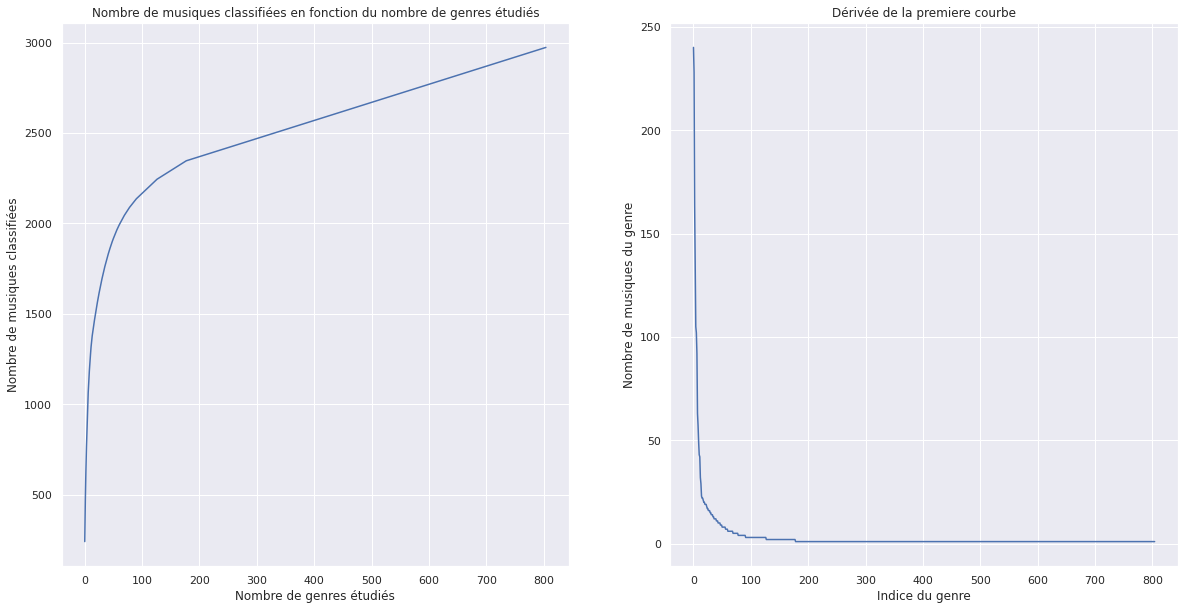

In [ ]:
genresUniquesTries=np.sort(np.unique(genresMotUniques, return_counts=True)[1],axis=None)[::-1]
cumSumGenresUniques=np.cumsum(genresUniquesTries)

fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(121)
ax1.title.set_text('Nombre de musiques classifiées en fonction du nombre de genres étudiés')
ax1.plot(cumSumGenresUniques)
ax1.set_xlabel('Nombre de genres étudiés')
ax1.set_ylabel('Nombre de musiques classifiées')

ax2=fig.add_subplot(122)
ax2.title.set_text('Dérivée de la premiere courbe')
ax2.plot(genresUniquesTries)
ax2.set_xlabel('Indice du genre')
ax2.set_ylabel('Nombre de musiques du genre')
plt.show()

In [ ]:
print("Nombre de mots distincts", len(nombreDeMotsParGenre))
print("Nombre de genres après reclassement, sans ignorer de genres", len(np.unique(genresMotUniques)))
print("Nombre de genres après reclassement, en ignorant les genres contenus dans une unique musique", len(np.unique(genresExcluantMusiqueUnique)))

Nombre de mots distincts 1683
Nombre de genres après reclassement, sans ignorer de genres 805
Nombre de genres après reclassement, en ignorant les genres contenus dans une unique musique 320


In [ ]:
print("Nombre de musiques dont le genre comprend le mot 'Japanese'",nombreDeMotsParGenre[nombreDeMotsParGenre[:,0]=='japanese'][0,1])
print("Nombre de musiques effectivement classées dans le genre 'Japanese'", len(genresMotUniques[genresMotUniques=='japanese']))

Nombre de musiques dont le genre comprend le mot 'Japanese' 40
Nombre de musiques effectivement classées dans le genre 'Japanese' 20


### Régression en utilisant les nouveaux genres

In [ ]:
le=sk.preprocessing.LabelEncoder()
genresExcluantMusiqueUniqueEncode=le.fit_transform(genresExcluantMusiqueUnique)
X2NouveauxGenres=np.append(X2, genresExcluantMusiqueUniqueEncode.reshape(len(X2),1), axis=1)
scaler2=sk.preprocessing.StandardScaler().fit(X2NouveauxGenres)
X2NouveauxGenres=scaler2.transform(X2NouveauxGenres)


In [ ]:
skf=skms.KFold(n_splits=5, shuffle=True, random_state=0)
XN_train2,XN_test2,y_train2,y_test2=skms.train_test_split(X2NouveauxGenres,y2)

def regression2(regressor):
    regressor.fit(XN_train2,y_train2)
    scoreKFOLD=skms.cross_val_score(regressor,XN_train2,y_train2,scoring='r2',cv=skf)
    print("r2 sur les k-folds",scoreKFOLD,"\nMoyenne sur les k-folds",np.mean(scoreKFOLD),"\nr2 sur les données de test",regressor.score(XN_test2,y_test2))

#### Bagging

In [ ]:
bag=ens.BaggingRegressor(n_estimators=120)
regression2(bag)

r2 sur les k-folds [0.59199527 0.51111566 0.45863709 0.57847471 0.53115954] 
Moyenne sur les k-folds 0.5342764559951173 
r2 sur les données de test 0.555134399905774


#### Neural Network

In [ ]:
dimension=X2NouveauxGenres.shape[1]
input_shape=(dimension,)

model=tf.keras.Sequential([
tf.keras.Input(shape=input_shape),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1,activation='linear')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                448       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 64
epochs = 200

model.compile(loss="MSE", optimizer="adam", metrics=[r2])

model.fit(XN_train2, y_train2, batch_size=batch_size, epochs=epochs, validation_split=0.1, shuffle=True)

Epoch 1/200
32/32 [==============================] - 1s 7ms/step - loss: 109.5422 - r2: 0.5743 - val_loss: 160.8768 - val_r2: 0.3113
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 117.9535 - r2: 0.5753 - val_loss: 160.0539 - val_r2: 0.3134
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 117.2442 - r2: 0.5666 - val_loss: 162.0595 - val_r2: 0.3059
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 122.7478 - r2: 0.5441 - val_loss: 162.6481 - val_r2: 0.3018
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 125.3279 - r2: 0.5586 - val_loss: 161.0682 - val_r2: 0.3108
Epoch 6/200
32/32 [==============================] - 0s 3ms/step - loss: 120.1058 - r2: 0.5641 - val_loss: 162.5751 - val_r2: 0.3031
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 122.4193 - r2: 0.5531 - val_loss: 160.3666 - val_r2: 0.3136
Epoch 8/200
32/32 [==============================] - 0s 3ms/step - lo

In [ ]:
print(model.metrics_names)
score = model.evaluate(XN_test2, y_test2, verbose=0)
print(score)

['loss', 'r2']
[126.9865493774414, 0.5435400009155273]


## Études supplémentaires

### Visualisation

#### ACP

Text(0, 0.5, 'Variance expliquée')

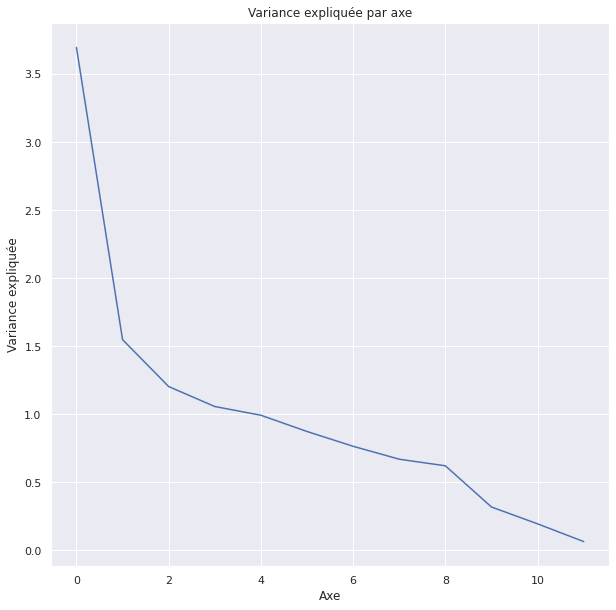

In [ ]:
acpToutesDim=sk.decomposition.PCA()
acpToutesDim.fit(X2)

fig=plt.figure(figsize=(10,10))
ax1=fig.add_subplot(111)
ax1.title.set_text('Variance expliquée par axe')
ax1.plot(acpToutesDim.explained_variance_)
ax1.set_xlabel('Axe')
ax1.set_ylabel('Variance expliquée')

In [ ]:
acp2D=sk.decomposition.PCA(n_components=2)
X2_2D=acp2D.fit_transform(X2)
pd.DataFrame(data=acp2D.components_,columns=colonnes)

mode  acousticness  danceability  ...     tempo   valence       key
0  0.050833      0.412392     -0.324128  ... -0.258835 -0.303165 -0.073110
1 -0.102243     -0.345057     -0.420129  ...  0.277863 -0.477859  0.037821

[2 rows x 12 columns]

#### Visualisation des genres

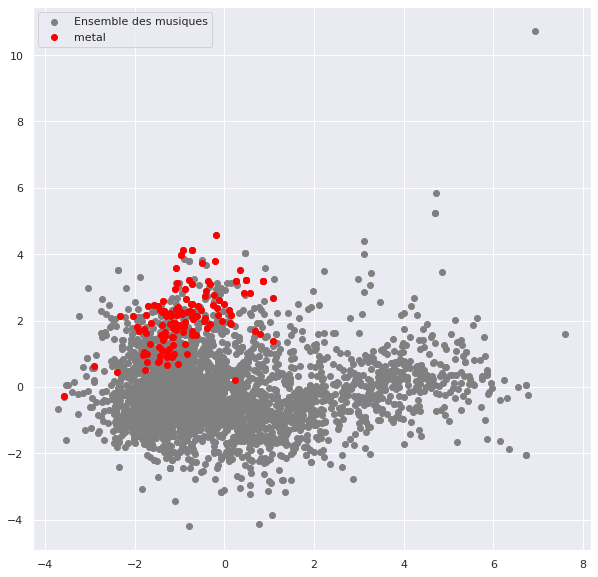

In [ ]:
def plotgenre(genreAPlotter='metal', data2D=X2_2D, genres=genresMotUniques, couleurGenre='red'):
    pointsGenre=[]
    for (ligne,genreLigne) in zip(data2D,genres):
        if genreLigne==genreAPlotter:
            pointsGenre.append(ligne)
    pointsGenre=np.array(pointsGenre)
    pointsGenre=np.array(pointsGenre)
    plt.figure(figsize=(10,10))
    plt.scatter(data2D[:,0], data2D[:,1], color='grey', label="Ensemble des musiques")
    plt.scatter(pointsGenre[:,0],pointsGenre[:,1], color=couleurGenre, label=genreAPlotter)
    plt.legend()
    plt.show()

plotgenre(genreAPlotter='metal')

Le point tout en haut à droite correspond à du 'bulgarian experimental', genre qui semble effectivement difficile à classer à l'oreille :
https://youtu.be/xYJARN0_C-g?t=422

#### Visualisation de la popularité

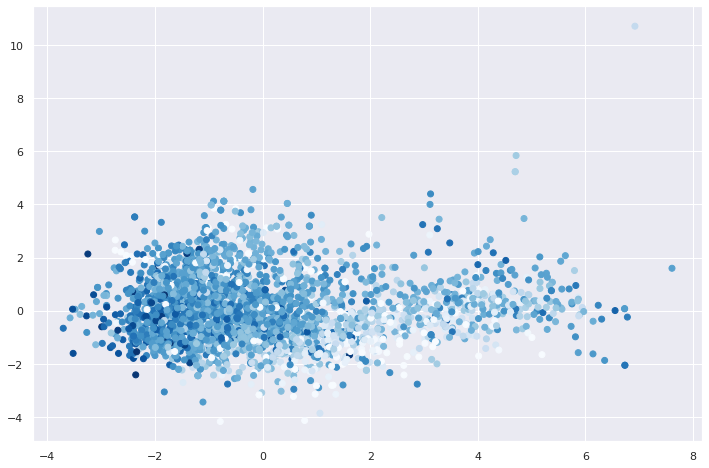

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X2_2D[:,0], X2_2D[:,1], c=y2, cmap='Blues')

### Clustering

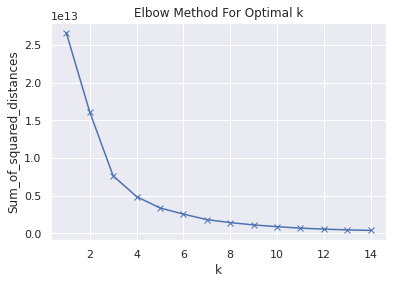

In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = sk.cluster.KMeans(n_clusters=k)
    km = km.fit(ex2SsGenre)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

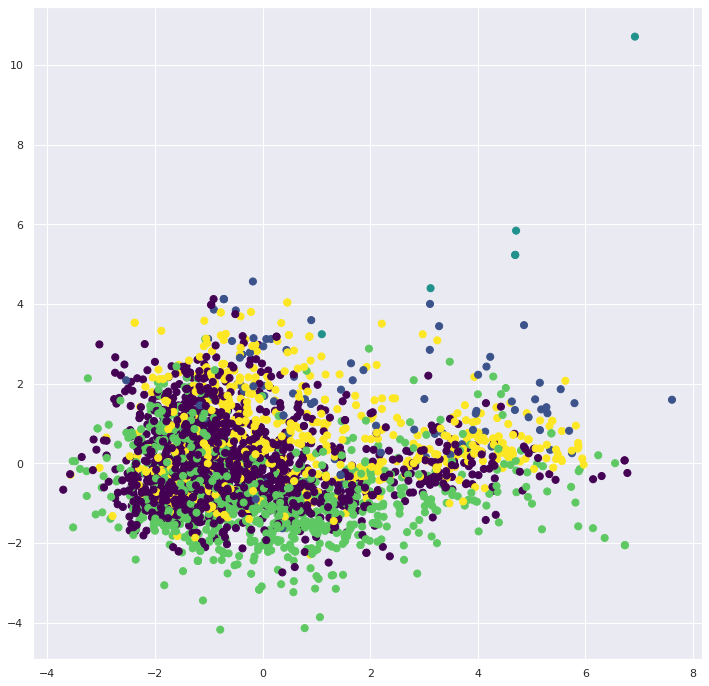

In [ ]:
kmf=clu.KMeans(n_clusters=5).fit(ex2SsGenre)
y_kmeans = kmf.predict(ex2SsGenre)
plt.figure(figsize=(12,12))
plt.scatter(X2_2D[:,0],X2_2D[:,1], c=y_kmeans, s=50, cmap='viridis')